In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets

In [38]:
df=pd.read_csv(r"C:\Users\dell\HomePrices.csv")
df.area=df.area.values.reshape(-1,1)

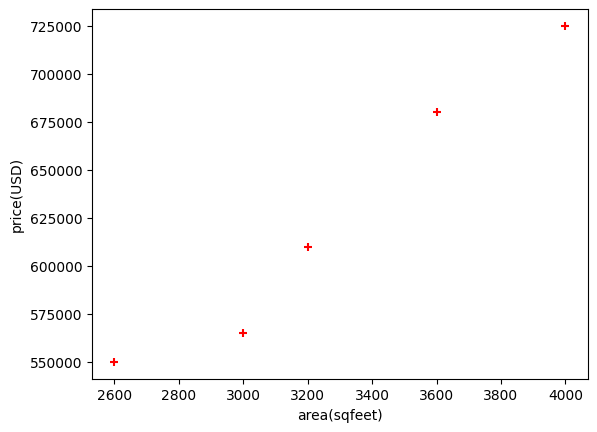

In [5]:
%matplotlib inline
plt.xlabel('area(sq feet)')
plt.ylabel('price(USD)')
plt.scatter((df.area),(df.price), color='red',marker='+')

In [20]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)


LinearRegression()

In [21]:
reg.coef_

array([134.07534247])

In [29]:
reg.predict([3000,])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[3000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Multi features Linear regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model,datasets
import math

In [7]:
df=pd.read_csv(r"C:\Users\dell\DataFiles\Home_Age_price.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [8]:
df=df.fillna(math.floor(df.bedrooms.median()))
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [9]:
reg=linear_model.LinearRegression()

In [10]:
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [11]:
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [12]:
reg.intercept_

383724.99999999977

In [13]:
reg.predict([[3000,3,40]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [14]:
137.25*3000-26025*3-6825*40+383724.99999999

444399.99999999

In [15]:
reg.predict([[2500,4,5]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

#Exercise 0f Hiring data

In [16]:
df=pd.read_csv(r"C:\Users\dell\DataFiles\Hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [17]:
from word2number import w2n

In [18]:
df.experience=df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [19]:
df.experience=df.experience.apply(w2n.word_to_num)

In [20]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [21]:
mean_test_score=math.floor(df['test_score(out of 10)'].mean())

In [22]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(mean_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [23]:
reg=linear_model.LinearRegression()

In [24]:
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [25]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [26]:
reg.intercept_

14992.65144669314

In [27]:
reg.predict([[2,9,6]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [28]:
reg.predict([[12,10,10]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [75]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum((y-y_predicted)**2)
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0 iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002 iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001 iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613 iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832 iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282 iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438 iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738 iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156 iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794 iteration 9


In [29]:
import pickle

In [30]:
with open('model_pickle','wb')as f:
    pickle.dump(reg,f)

In [31]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [32]:
mp.predict([[2,9,6]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [33]:
mp.predict([[25,4,5]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107672.02605241])

In [35]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\ProgramData\anaconda3\lib\site-packages\sklearn\externals\__init__.py)